In [1]:
import polars as pl
from matplotlib import pyplot
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
cleaned=pl.read_parquet("collated_crypto.parquet")

In [3]:
cleaned

symbol,time,high,low,open,close
str,datetime[μs],f64,f64,f64,f64
"""BTC""",2023-03-21 00:00:00,28494.87,27416.8,27807.05,28188.11
"""BTC""",2023-03-22 00:00:00,28902.98,26676.69,28188.11,27316.18
"""BTC""",2023-03-23 00:00:00,28807.82,27190.13,27316.18,28345.7
"""BTC""",2023-03-24 00:00:00,28421.94,27054.76,28345.7,27493.01
"""BTC""",2023-03-25 00:00:00,27819.55,27186.95,27493.01,27492.83
…,…,…,…,…,…
"""LTC""",2024-03-16 00:00:00,90.71,82.26,89.76,84.07
"""LTC""",2024-03-17 00:00:00,86.74,80.67,84.07,85.85
"""LTC""",2024-03-18 00:00:00,88.06,80.77,85.85,86.78


In [4]:
new = cleaned.filter(cleaned["symbol"] == "LTC")

In [5]:
x_value=new["time"]
y_value=new["close"]

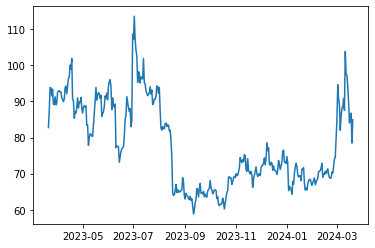

In [6]:
plot=pyplot.plot(x_value,y_value)

In [7]:
returns = np.log(y_value / y_value.shift(1))
returns = returns.replace(None, 0)

In [21]:
 new=new.with_columns(returns=returns)

In [22]:
new

symbol,time,high,low,open,close,returns
str,datetime[μs],f64,f64,f64,f64,f64
"""LTC""",2023-03-21 00:00:00,83.63,77.04,78.23,82.75,0.0
"""LTC""",2023-03-22 00:00:00,88.43,79.48,82.75,87.43,0.055014
"""LTC""",2023-03-23 00:00:00,94.7,85.8,87.43,93.85,0.070859
"""LTC""",2023-03-24 00:00:00,96.02,89.25,93.85,93.78,-0.000746
"""LTC""",2023-03-25 00:00:00,94.14,90.14,93.78,91.55,-0.024066
…,…,…,…,…,…,…
"""LTC""",2024-03-16 00:00:00,90.71,82.26,89.76,84.07,-0.06549
"""LTC""",2024-03-17 00:00:00,86.74,80.67,84.07,85.85,0.020952
"""LTC""",2024-03-18 00:00:00,88.06,80.77,85.85,86.78,0.010775
